In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

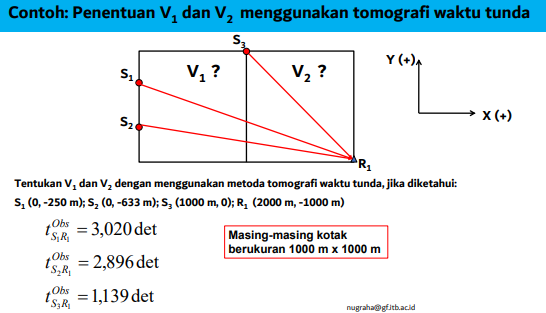

In [2]:
s1 = [0,-250] # meter
s2 = [0,-633] # meter
s3 = [1000, 0] # meter
r1 = [2000, -1000] # meter

t_obs11 = 3.020 # second
t_obs21 = 2.896 # second
t_obs31 = 1.139 # second

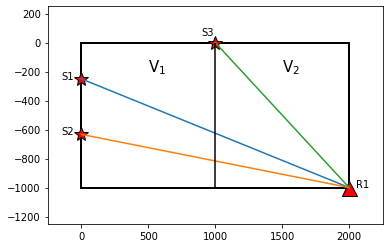

In [3]:
plt.plot(s1[0],s1[1], marker="*", color="red", markersize=15, markeredgecolor='black')
plt.plot(s2[0],s2[1], marker="*", color="red", markersize=15, markeredgecolor='black')
plt.plot(s3[0],s3[1], marker="*", color="red", markersize=15, markeredgecolor='black')
plt.plot(r1[0],r1[1], marker="^", color="red", markersize=15, markeredgecolor='black')

plt.annotate("S1", xy=[s1[0]-150, s1[1]])
plt.annotate("S2", xy=[s2[0]-150, s2[1]])
plt.annotate("S3", xy=[s3[0]-100, s3[1]+50])
plt.annotate("R1", xy=[r1[0]+50, r1[1]])

plt.plot([s1[0],r1[0]], [s1[1],r1[1]])
plt.plot([s2[0],r1[0]], [s2[1],r1[1]])
plt.plot([s3[0],r1[0]], [s3[1],r1[1]])

plt.annotate("V$_1$", xy=[500, -200], size=15)
plt.annotate("V$_2$", xy=[1500, -200], size=15)

rectangle = patches.Rectangle((0, -1000), 2000, 1000, fc="none", edgecolor='black', linewidth=2)
plt.gca().add_patch(rectangle)

plt.vlines(x=1000, ymin=-1000, ymax=0, color='black')

plt.xlim(-250, 2250)
plt.ylim(-1250, 250)


plt.show()

# Penentuan V1 dan V2

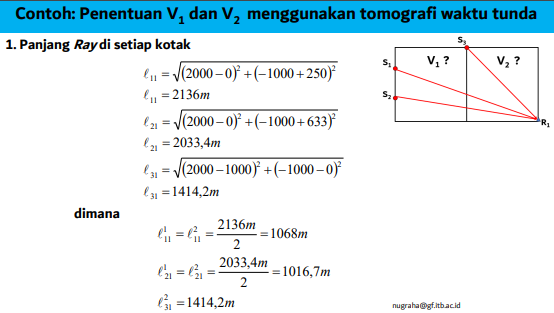

In [4]:
def panjang_raypath(s,r):
    l_sr = np.sqrt((r[0] - s[0])**2 + (r[1] - s[1])**2) # meter
    return l_sr

In [5]:
l11 = panjang_raypath(s1,r1)
l21 = panjang_raypath(s2,r1)
l31 = panjang_raypath(s3,r1)

l11,l21,l31

(2136.000936329383, 2033.3934690560998, 1414.213562373095)

### Menghitung V0 dan t_cal

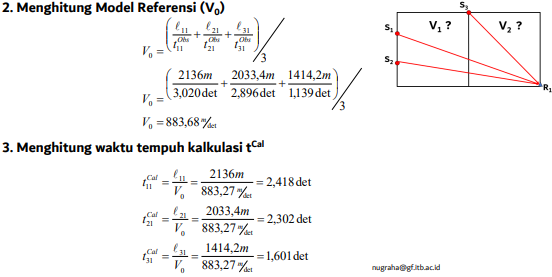

In [6]:
# model referensi (V0) # m/s
v0 = ((l11/t_obs11)+(l21/t_obs21)+(l31/t_obs31))/3
v0

883.6836888289863

In [7]:
# waktu tempuh kalkulasi (t_cal) # second

t_cal11 = l11/v0
t_cal21 = l21/v0
t_cal31 = l31/v0

t_cal11, t_obs11, t_cal31

(2.4171555538836587, 3.02, 1.6003617360496272)

In [8]:
# waktu tunda # (d_t) second

d_t11 = t_obs11-t_cal11
d_t21 = t_obs21-t_cal21
d_t31 = t_obs31-t_cal31

d_t11, d_t21, d_t31

(0.6028444461163414, 0.5949577891262745, -0.46136173604962716)

### Persamaan Matriks Tomografi

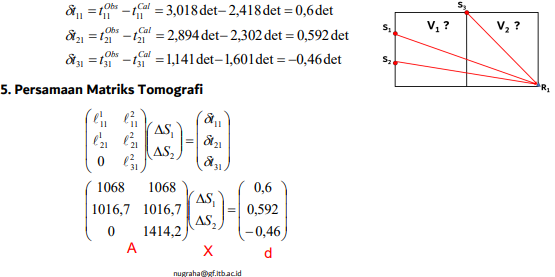

In [9]:
# persamaan matriks tomografi

A = np.array([[l11/2, l11/2], [l21/2, l21/2], [0, l31]])
d = np.array([d_t11, d_t21, d_t31])
d

array([ 0.60284445,  0.59495779, -0.46136174])

### Solusi Inversi

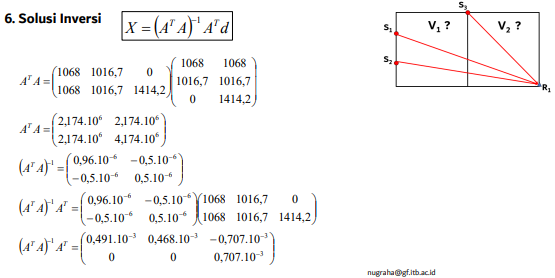

In [10]:
# X = (A^T A)^-1 A d

X = (np.linalg.inv(np.transpose(A).dot(A)).dot(np.transpose(A))).dot(d)

d_s1 = X[0]
d_s2 = X[1]
X

array([ 0.00090055, -0.00032623])

### delta V <<<<

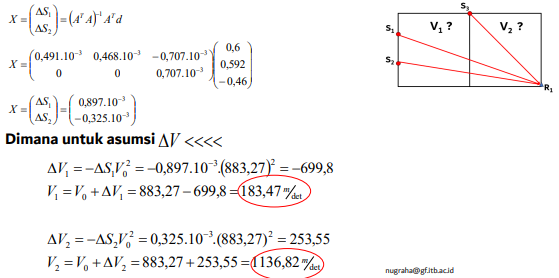

In [11]:
d_v1k = -d_s1*(v0**2)
d_v2k = -d_s2*(v0**2)

v1k = v0 + d_v1k # m/s
v2k = v0 + d_v2k # m/s

v1k, v2k

(180.44997548118874, 1138.4372433617577)

### delta V >>>>

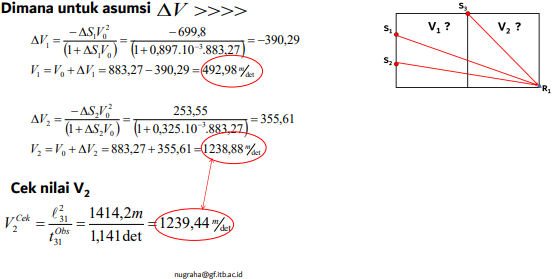

In [12]:
d_v1b = (-d_s1*(v0**2))/(1+(d_s1*v0))
d_v2b = (-d_s2*(v0**2))/(1+(d_s2*v0))

v1b = v0+d_v1b # m/s
v2b = v0+d_v2b # m/s

v1b, v2b

(492.0841253812227, 1241.627359414482)

In [13]:
v2_cek = l31/t_obs31
v2_cek

1241.627359414482

In [14]:
selisih = abs(v2_cek - v2b)
selisih

0.0

In [15]:
v0

883.6836888289863

In [16]:
t_cal31

1.6003617360496272

In [18]:
A.dot(X)

array([ 0.61336784,  0.58390337, -0.46136174])